# R-programming Project

# Project: Analysis and Prediction of Airbnb Listing Prices

# 1. Data Importing:

# Loading Data:

In [ ]:
# Read the Data:
airbnb <-read_csv("../input/seattle-airbnb-listings/seattle_01.csv"))


── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_double(),
  room_id = col_double(),
  host_id = col_double(),
  room_type = col_character(),
  address = col_character(),
  reviews = col_double(),
  overall_satisfaction = col_double(),
  accommodates = col_double(),
  bedrooms = col_double(),
  bathrooms = col_double(),
  price = col_double(),
  last_modified = col_datetime(format = ""),
  latitude = col_double(),
  longitude = col_double(),
  location = col_character(),
  name = col_character(),
  currency = col_character(),
  rate_type = col_character()
)




2. **Data Cleaning and Transformation:**
:
- Use dplyr and tidyr to clean the data and prepare it for analysis. This may include handling missing values, outliers, or erroneous data.
   - Transform the data as necessary for analysis. This may include creating new variables, recoding variables, or restructuring the data.


In [ ]:
dim(airbnb)
str(airbnb)

[1] 7576   18

spec_tbl_df [7,576 × 18] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ X1                  : num [1:7576] 0 1 2 3 4 5 6 7 8 9 ...
 $ room_id             : num [1:7576] 2318 3335 4291 5682 6606 ...
 $ host_id             : num [1:7576] 2536 4193 35749 8993 14942 ...
 $ room_type           : chr [1:7576] "Entire home/apt" "Entire home/apt" "Private room" "Entire home/apt" ...
 $ address             : chr [1:7576] "Seattle, WA, United States" "Seattle, WA, United States" "Seattle, WA, United States" "Seattle, WA, United States" ...
 $ reviews             : num [1:7576] 21 1 63 462 134 130 401 35 36 76 ...
 $ overall_satisfaction: num [1:7576] 5 NA 4.5 5 4.5 4.5 5 5 5 4.5 ...
 $ accommodates        : num [1:7576] 8 4 2 2 2 2 2 4 3 4 ...
 $ bedrooms            : num [1:7576] 4 2 1 0 1 1 1 2 2 1 ...
 $ bathrooms           : num [1:7576] 2.5 1 1 1 1 3 1 1 1 1 ...
 $ price               : num [1:7576] 250 100 82 49 90 65 78 165 95 115 ...
 $ last_modified       : POSIXct[1:7576], format: "2018-12

# Data Cleaning:
Storing the dataset into dataframe

In [ ]:
airbnb <-as.data.frame(airbnb)
class(airbnb)

[1] "data.frame"

## Searching NA vlaues

In [ ]:
sum(is.na(airbnb))

[1] 1475

## NA's Values:

In [ ]:
colSums(is.na(airbnb))

X1              room_id              host_id 
                   0                    0                    0 
           room_type              address              reviews 
                   0                    0                    0 
overall_satisfaction         accommodates             bedrooms 
                1473                    0                    0 
           bathrooms                price        last_modified 
                   2                    0                    0 
            latitude            longitude             location 
                   0                    0                    0 
                name             currency            rate_type 
                   0                    0                    0

overall_satisfaction" has 1473 NAs while bathrooms has 2.

In [ ]:
na_vis <- data.frame(t(colSums(is.na(airbnb))))
na_bar <- data.frame(Features = names(na_vis),totals=colSums(na_vis))

## Visulaization of NA's Values:

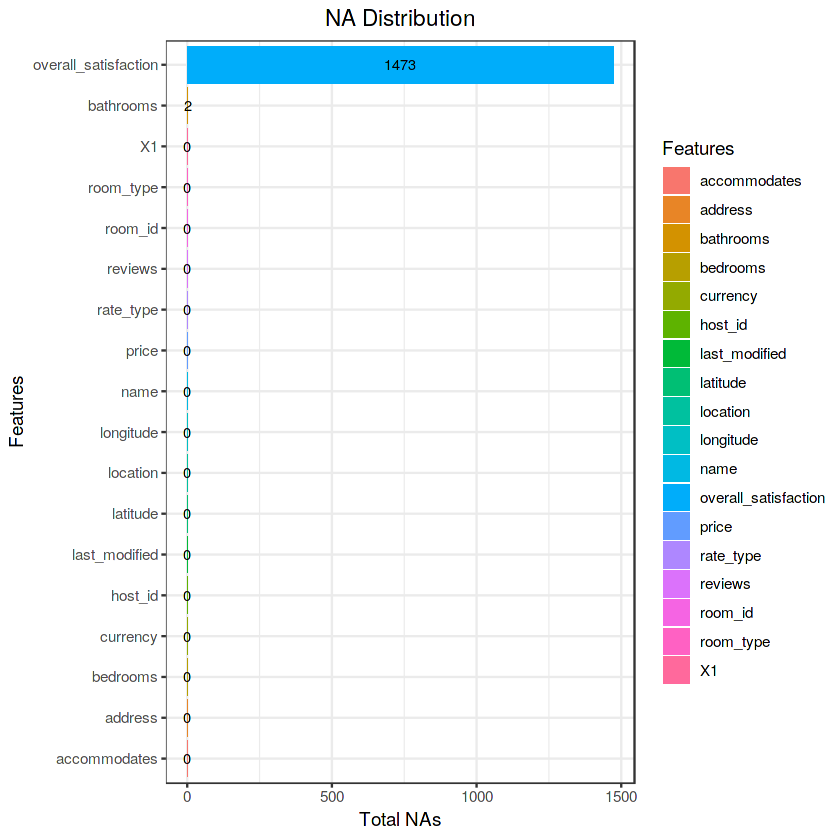

In [ ]:
na_bar %>% ggplot(aes(x = reorder(Features, totals), y = totals, fill = Features, label = totals))+
  geom_bar(stat = "identity")+
  ggtitle("NA Distribution")+
  xlab("Features")+
  ylab("Total NAs")+
  coord_flip()+
  geom_text(size = 3, position = position_stack(vjust = 0.5))+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

Only overall_satisfaction
& bathrooms has NA's value

# NA Removal:

In [ ]:
airbnb$overall_satisfaction[is.na(airbnb$overall_satisfaction)] <- mean(airbnb$overall_satisfaction, na.rm = TRUE)

The mean is roughly 4.84.

In [ ]:
mean(airbnb$overall_satisfaction)

[1] 4.841

Confirm the absence of NAs in this feature:

In [ ]:
head(airbnb$overall_satisfaction)

[1] 5.000 4.841 4.500 5.000 4.500 4.500

For the bathrooms feature, there are only 2 NAs and so we set them to zero.

In [ ]:
airbnb <-airbnb %>% replace_na(list(bathrooms = 0))

Now confirm the absence of any NAs in the dataset:

In [ ]:
sum(is.na(airbnb))

[1] 0

# Feature Exploration and Selection:


In [ ]:
names(airbnb)

[1] "X1"                   "room_id"              "host_id"             
 [4] "room_type"            "address"              "reviews"             
 [7] "overall_satisfaction" "accommodates"         "bedrooms"            
[10] "bathrooms"            "price"                "last_modified"       
[13] "latitude"             "longitude"            "location"            
[16] "name"                 "currency"             "rate_type"

There are 18 features and those less related to price prediction will be dropped to refine our EDA and Modeling Focus:

In [ ]:
head(airbnb$X1)

[1] 0 1 2 3 4 5

"X1" is simply a numerical list for the dataset.

## Features: "room_id" & "host_id"

In [ ]:
head(airbnb$room_id)
head(airbnb$host_id)

[1] 2318 3335 4291 5682 6606 9419

[1]  2536  4193 35749  8993 14942 30559

"room_id" & "host_id" are simply numbers arbitrarily assigned to identify rooms
and hosts.

## Feature: "address"

Check for unique values of the feature "address"

In [ ]:
airbnb %>% select(address) %>% distinct()

address
<chr>
"Seattle, WA, United States"
"Kirkland, WA, United States"
"Bellevue, WA, United States"
"Redmond, WA, United States"
"Mercer Island, WA, United States"
"Seattle, WA"
"Renton, WA, United States"
"Ballard, Seattle, WA, United States"
"West Seattle, WA, United States"


Note that there are 27 values with different formats and 12 repeated instances of "Seattle." Any neighborhood of Seattle, the Chinese language version of "Seattle" and listings with only the State of Washington, will all be converted to Seattle. "WA" and "United States" will also be removed as they are redundant.

In [ ]:
address_clean <-gsub("Seattle, WA, United States", "Seattle",
  gsub("Kirkland, WA, United States", "Kirkland",
  gsub("Bellevue, WA, United States", "Bellevue",
  gsub("Redmond, WA, United States", "Redmond",
  gsub("Mercer Island, WA, United States", "Mercer Island",
  gsub("Seattle, WA", "Seattle",
  gsub("Renton, WA, United States", "Renton",
  gsub("Ballard, Seattle, WA, United States", "Seattle",
  gsub("West Seattle, WA, United States", "Seattle",
  gsub("Medina, WA, United States", "Medina",
  gsub("Newcastle, WA, United States", "Newcastle",
  gsub("Seattle , WA, United States", "Seattle",
  gsub("Ballard Seattle, WA, United States", "Seattle",
  gsub("Yarrow Point, WA, United States", "Yarrow Point",
  gsub("Clyde Hill, WA, United States", "Clyde Hill",
  gsub("Tukwila, WA, United States", "Tukwila",
  gsub("Seattle, Washington, US, WA, United States", "Seattle",
  gsub("Capitol Hill, Seattle, WA, United States", "Seattle",
  gsub("Kirkland , Wa, United States", "Kirkland",
  gsub("Hunts Point, WA, United States", "Hunts Point",
  gsub("Seattle, DC, United States", "Seattle",
  gsub("Seattle, United States", "Seattle",
  gsub("Vashon, WA, United States", "Vashon",
  gsub("Kirkland , WA, United States", "Kirkland",
  gsub("Bothell, WA, United States", "Bothell",
  gsub("Washington, WA, United States", "Seattle",
      airbnb$address))))))))))))))))))))))))))

Replace the Chinese version of "Seattle" separately using regex:

In [ ]:
address_clean2 <-gsub(".*WA*.", "Seattle", address_clean)

Reassign the column to the feature "address":

In [ ]:
airbnb$address <-gsub("Seattle, United States", "Seattle",
                 gsub("Seattle United States", "Seattle", address_clean2))

Now confirm there are only 14 different cities and sort by the greatest numbers of listings:

In [ ]:
city_list <-airbnb %>% group_by(address) %>% summarize(listing_sum = n()) %>%
  arrange(-listing_sum)
city_list

address,listing_sum
<chr>,<int>
Seattle,6791
Bellevue,322
Kirkland,202
Redmond,110
Mercer Island,50
Newcastle,49
Renton,39
Medina,4
Bothell,2


###: Let's explore a data visualization to confirm this:

Note: As the remaining locations are all cities, the feature "address" will
later be renamed "city."

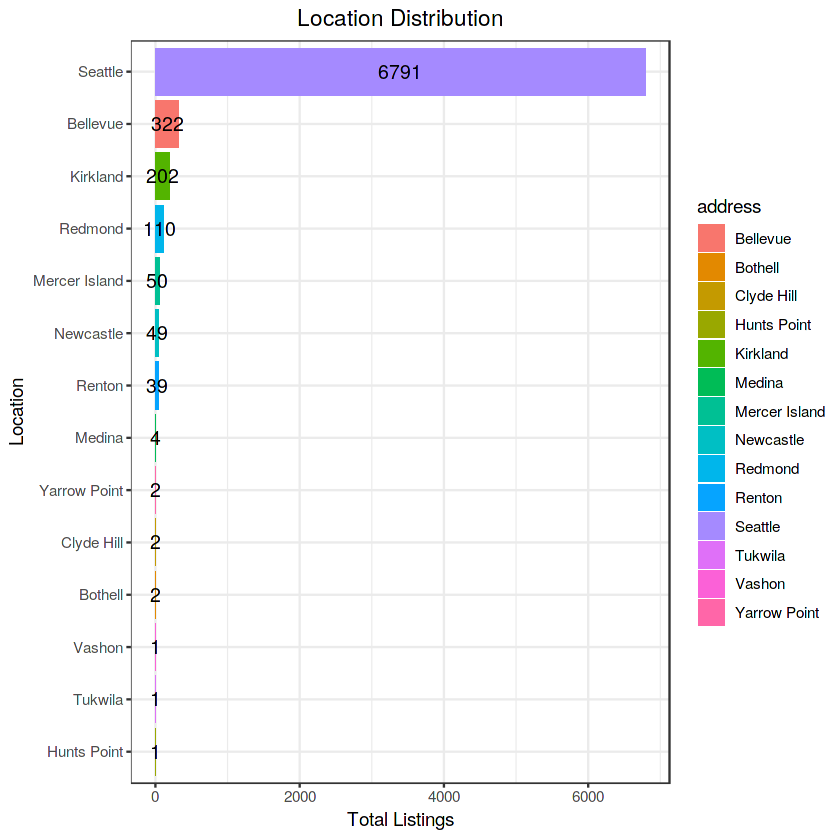

In [ ]:
city_list %>%
  ggplot(aes(x = reorder(address, listing_sum), y = listing_sum,
                         fill = address, label = listing_sum))+
                         geom_bar(stat = "identity")+
                         ggtitle("Location Distribution")+
                         xlab("Location")+
                         ylab("Total Listings")+
                         coord_flip()+
                         geom_text(size = 4,
                                   position = position_stack(vjust = 0.5))+
                         theme_bw()+
                         theme(plot.title = element_text(hjust = 0.5))

It is clear the vast majority of listings are in Seattle (6791).

In [ ]:
head(airbnb$last_modified)

[1] "2018-12-20 03:46:14 UTC" "2018-12-20 04:08:45 UTC"
[3] "2018-12-20 03:04:19 UTC" "2018-12-20 04:11:25 UTC"
[5] "2018-12-20 03:12:38 UTC" "2018-12-20 04:08:20 UTC"

## Feature: "location"

The "location" feature will be removed in favor of using "latitude" & "longitude."

head(airbnb$location)

## Feature: "name"

The "name" feature will be removed as it is a categorical description of each listing.

In [ ]:
head(airbnb$name)

[1] "Casa Madrona - Urban Oasis, 1 block from the Park!"
[2] "Sweet Seattle Urban Homestead 2 Bdr"               
[3] "Sunrise in Seattle Master Suite"                   
[4] "Cozy Studio, min. to downtown -WiFi"               
[5] "Fab, private seattle urban cottage!"               
[6] "Glorious sun room w/ memory foambed"

## Feature: "currency"

The "currency" feature will be dropped as all rates are in US Dollars.

In [ ]:
airbnb %>% select(currency) %>% distinct()

currency
<chr>
USD


## Feature: "rate_type"

Check for distinct values of "rate_type":

In [ ]:
airbnb %>% select(rate_type) %>% distinct()

rate_type
<chr>
nightly


After confirming only one unique value, "nightly," we determine this feature can be removed.

# Create the cleaned dataset:

Remove the above mentioned features and rename the columns:


In [ ]:
airbnb <-airbnb %>% select(-c(X1, room_id, host_id, last_modified,
                              location, name, currency, rate_type)) %>%
                    rename(city = address, rating = overall_satisfaction,
                           reviews_sum = reviews)

Reorder the columns:

In [ ]:
airbnb <-airbnb[,c(8, 2, 4, 3, 1, 6, 7, 5, 9, 10)]

Confirm the features have been tidied and reordered with only 10 features:


In [ ]:
names(airbnb)

[1] "price"        "city"         "rating"       "reviews_sum"  "room_type"   
 [6] "bedrooms"     "bathrooms"    "accommodates" "latitude"     "longitude"

Check the first few values of the cleaned dataset:

In [ ]:
head(airbnb)

,price,city,rating,reviews_sum,room_type,bedrooms,bathrooms,accommodates,latitude,longitude
,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,250,Seattle,5.000,21,Entire home/apt,4,2.5,8,47.61,-122.3
2,100,Seattle,4.841,1,Entire home/apt,2,1.0,4,47.53,-122.3
3,82,Seattle,4.500,63,Private room,1,1.0,2,47.69,-122.3
4,49,Seattle,5.000,462,Entire home/apt,0,1.0,2,47.52,-122.4
5,90,Seattle,4.500,134,Entire home/apt,1,1.0,2,47.65,-122.3
6,65,Seattle,4.500,130,Private room,1,3.0,2,47.55,-122.3


# 3. **Exploratory Data Analysis:**

   - Use various R functions and packages to explore the data. This can include summary statistics, correlations, and distributions.
   - Create visualizations using R's plotting capabilities. This can include scatter plots, boxplots, histograms, etc.


## Correlogram:

Remove non-numeric features:

In [ ]:
airbnb_num <-airbnb %>% select(-c(city, room_type))

Create the correlation matrix:

In [ ]:
airbnb_cor <-cor(airbnb_num)

Plot the Correlogram:

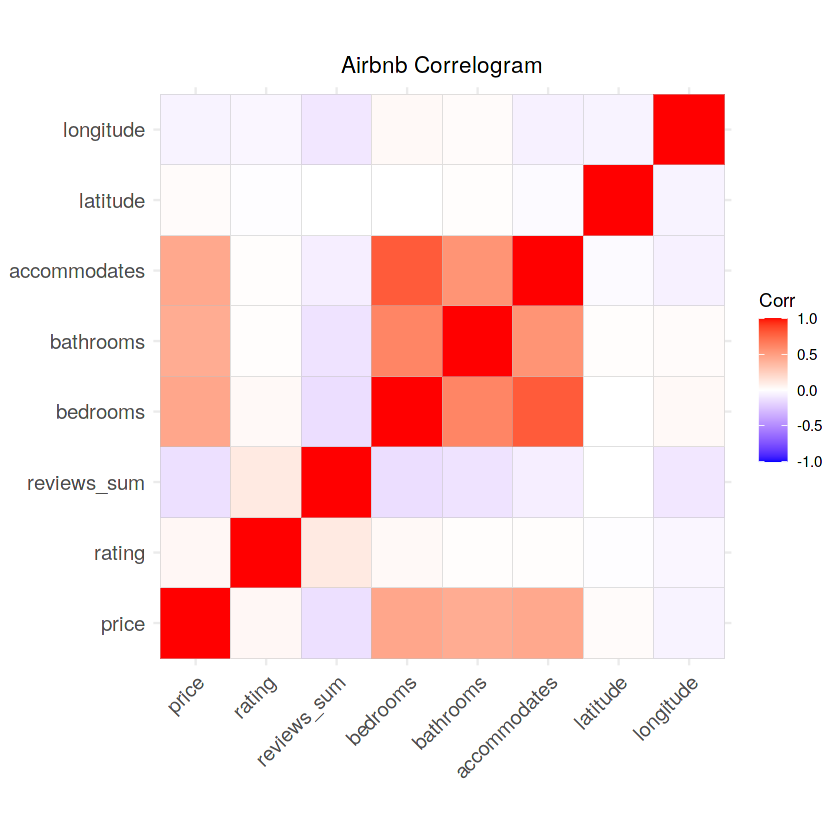

In [ ]:
ggcorrplot(airbnb_cor)+
  labs(title = "Airbnb Correlogram")+
  theme(plot.title = element_text(hjust = 0.5))

## Density Plot of Price Distribution below $300:

Most common Price of bookings

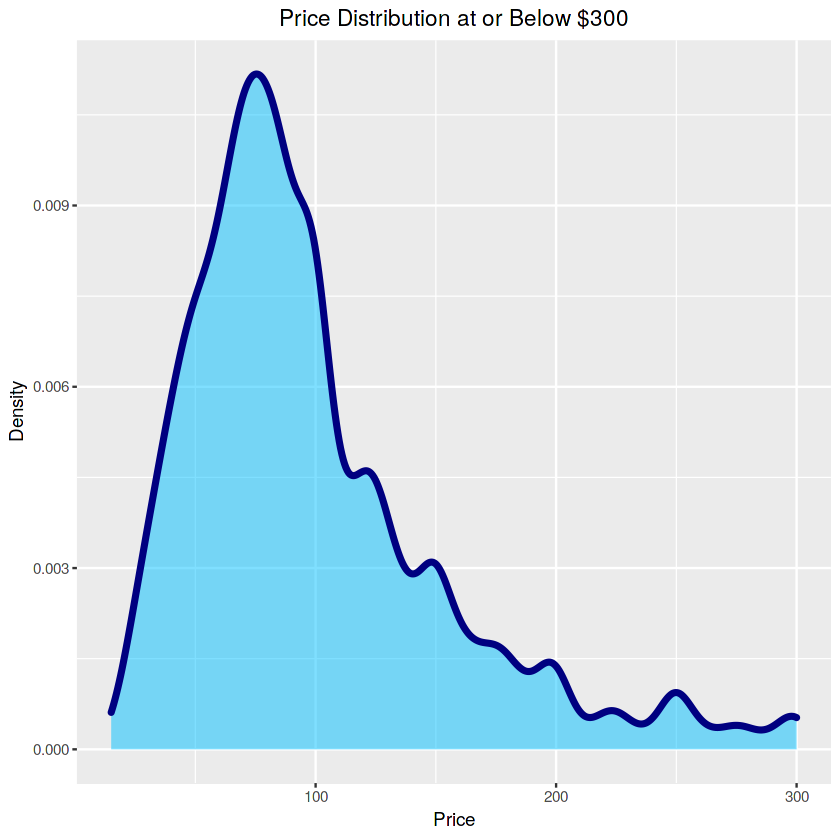

In [ ]:
airbnb %>% filter(price <=300) %>% ggplot(aes(price))+
  geom_density(fill = "deepskyblue", size = 1.5, color = "navyblue", alpha = 0.5)+
  xlab("Price")+
  ylab("Density")+
  ggtitle("Price Distribution at or Below $300")+
  theme(plot.title = element_text(hjust = 0.5))

The most common booking price is  $100/night.

## Geographical Scatterplot of Prices in Seattle:

Which area are more expensive than others

In [ ]:
seattle_map <- get_stamenmap(bbox = c(left = -122.5, bottom = 47.49,
                                      right = -122.09, top = 47.74),
                                      zoom = 9, maptype = "toner")

In [ ]:
summary(airbnb$price)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     15      65      88     113     125    5900 

Ad per visulaization Summary, we know what percentage of prices are less than or equal to 300.

In [ ]:
quantile(airbnb$price)
sum(airbnb$price <=300)/length(airbnb$price)

0%  25%  50%  75% 100% 
  15   65   88  125 5900

[1] 0.9652

In [ ]:
airbnb_map <-airbnb %>% filter(price <=300)

## Visualizing a "Heatmap" of Seattle with all listing prices included:


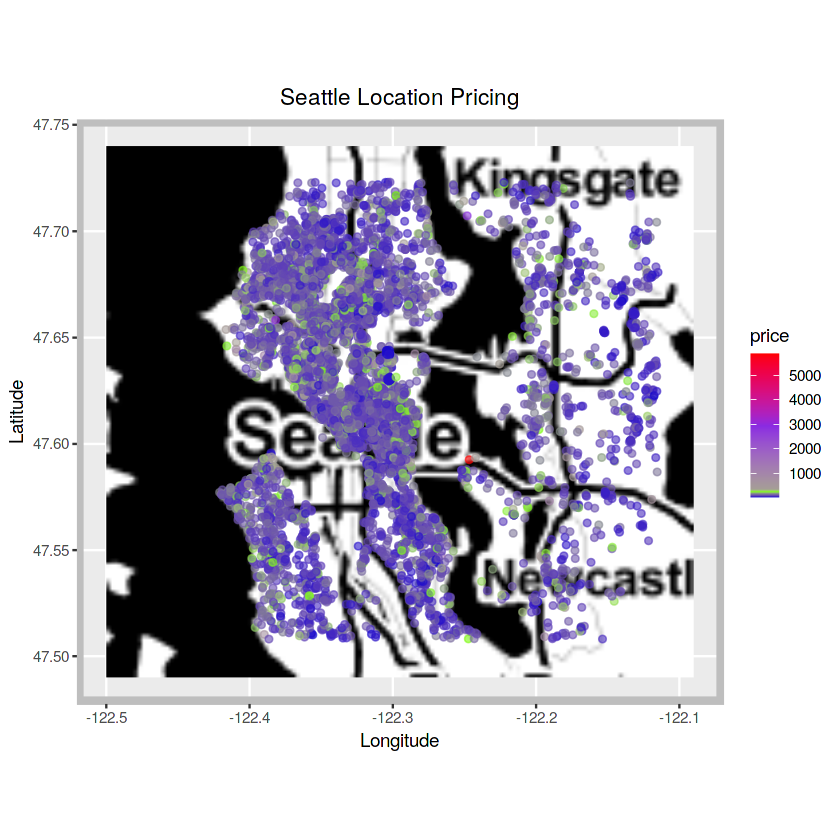

In [ ]:
ggmap(seattle_map, extent= "normal")+
  geom_point(data = airbnb,
             aes(x = longitude, y = latitude, color = price),
             size = 1.5, alpha = .6)+
  scale_color_gradientn(colors = c("mediumblue", "lawngreen", "blueviolet", "red"),
             values = scales::rescale(c(.003, .013, .0176, .025, .2, .3, .4)))+
  xlab("Longitude")+
  ylab("Latitude")+
  ggtitle("Seattle Location Pricing")+
  theme(plot.title = element_text(hjust = 0.5),
        panel.border = element_rect(color = "gray", fill=NA, size=3))

It seems no area is significantly pricier than others, with most prices under $1000. Outliers might be skewing the data, so let's refine our heatmap by filtering it.



---


## Heat Map of less than or equal to $300

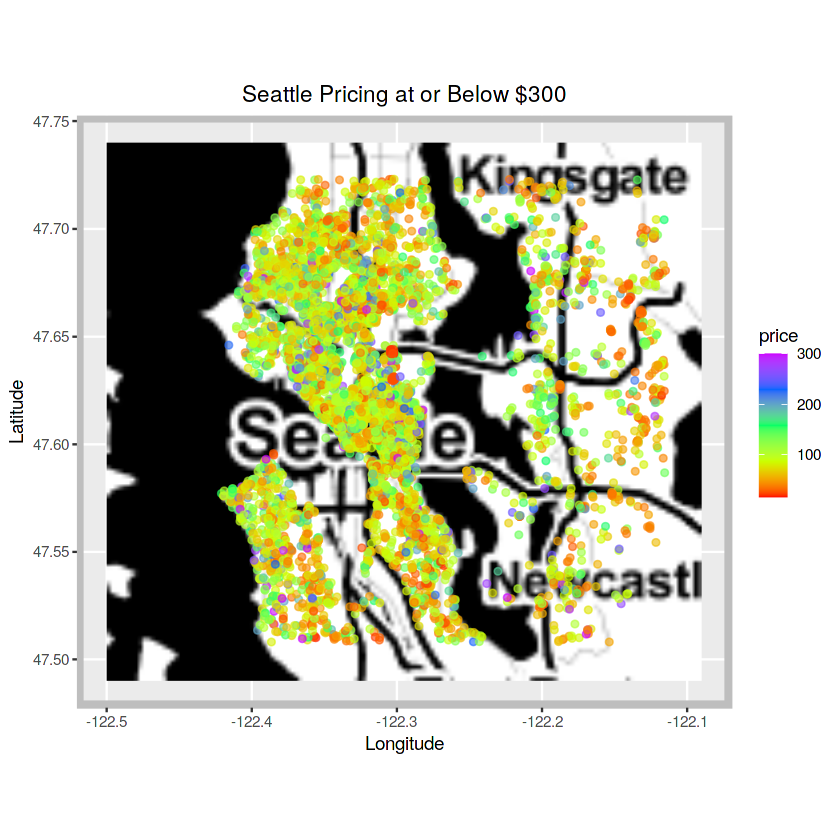

In [ ]:
ggmap(seattle_map, extent= "normal")+
  geom_point(data = airbnb_map,
             aes(x = longitude, y = latitude, color = price),
             size = 1.5, alpha = .6)+
  scale_color_gradientn(colours = rainbow(5))+
  xlab("Longitude")+
  ylab("Latitude")+
  ggtitle("Seattle Pricing at or Below $300")+
  theme(plot.title = element_text(hjust = 0.5),
        panel.border = element_rect(color = "gray", fill=NA, size=3))

The visualization shows most Seattle listings are between $50  and $150 per night, concentrated in Seattle proper. Confirm the percentage of listings in this range.

In [ ]:
sum(airbnb$price >= 50 & airbnb$price <= 150)/length(airbnb$price)

[1] 0.6998

70% of are in  range from USD 50 - 150/night.

# Treemap:

Sort the cities by listing_sum in a dataframe for the Treemap. Plot the Treemap to visualize the distribution of listings by city.


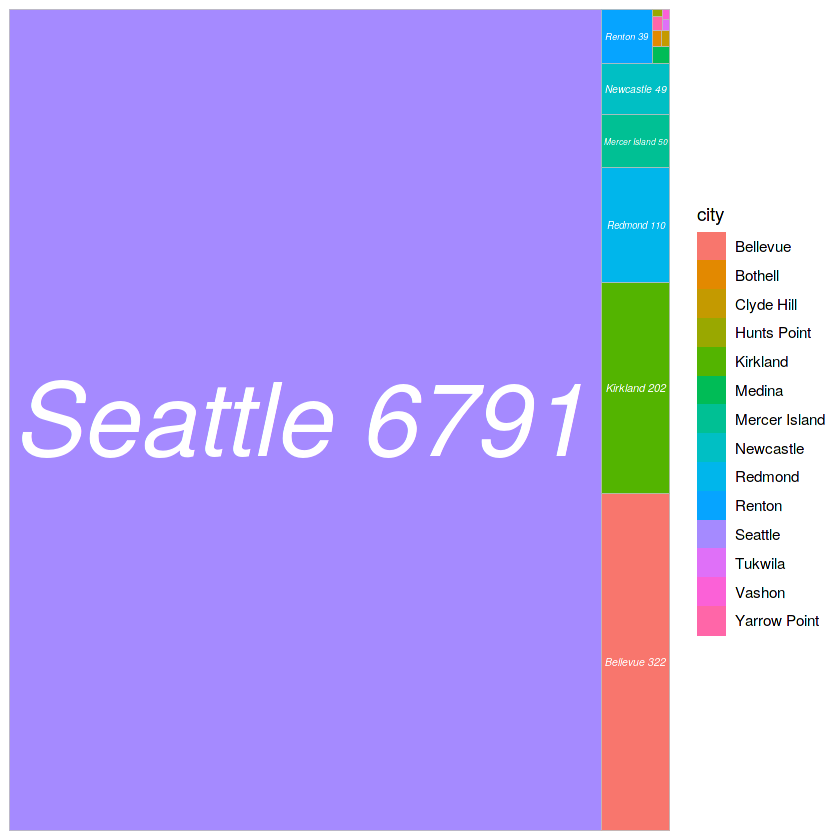

In [ ]:
city_distribution <-airbnb %>% group_by(city) %>% summarize(listing_sum = n()) %>%
  arrange(-listing_sum)
# Add column "tmlab" for Treemap labels
city_distribution <-city_distribution %>%
  unite("tmlab", city:listing_sum, sep = " ", remove = FALSE)
# Plot a Treemap to visualize the distribution of listings by city:
city_distribution %>% ggplot(aes(area = listing_sum, fill = city, label = tmlab))+
  geom_treemap()+
  geom_treemap_text(fontface = "italic", col = "white", place = "center",
                    grow = TRUE)

## Visualize Price by City:



In [ ]:
city_price <-airbnb %>% group_by(city) %>%
  summarize(mean_price = mean(price),
            listing_sum = n()) %>%
  arrange(-mean_price) %>% mutate(mean_price = sprintf("%0.1f", mean_price))
# Coerce the "mean_price" to integer:
city_price$mean_price <-as.integer(city_price$mean_price)

Plot the Visualization:


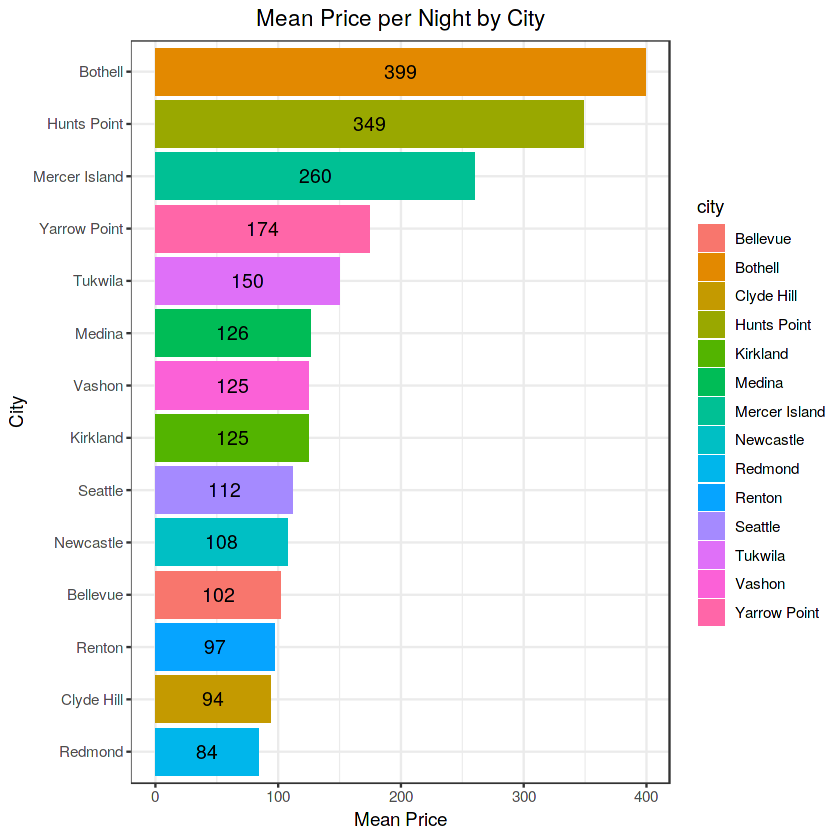

In [ ]:
city_price %>% ggplot(aes(x = reorder(city, mean_price), y = mean_price,
                         fill = city, label = mean_price))+
  geom_bar(stat = "identity")+
  coord_flip()+
  xlab("City")+
  ylab("Mean Price")+
  ggtitle("Mean Price per Night by City")+
  geom_text(size = 4,
            position = position_stack(vjust = 0.5))+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

## Visualize Mean Price & Sum of Listings by City:


In [ ]:
# Create dataframe "city_comp" with a percentage column:
city_comp <-city_price %>%
  mutate(percentage = sprintf("%0.3f",(listing_sum/sum(listing_sum)*100)))
# Add the % symbol to the percentage feature:

city_comp$percentage <- paste(city_comp$percentage, "%")

# Combine the mean price & percentage values into one column:
city_comp <-city_comp %>%
  unite("citylab", mean_price, percentage, sep = ", ", remove = FALSE)

Plot the visualization with Mean Price & Percentage of Total Listings:

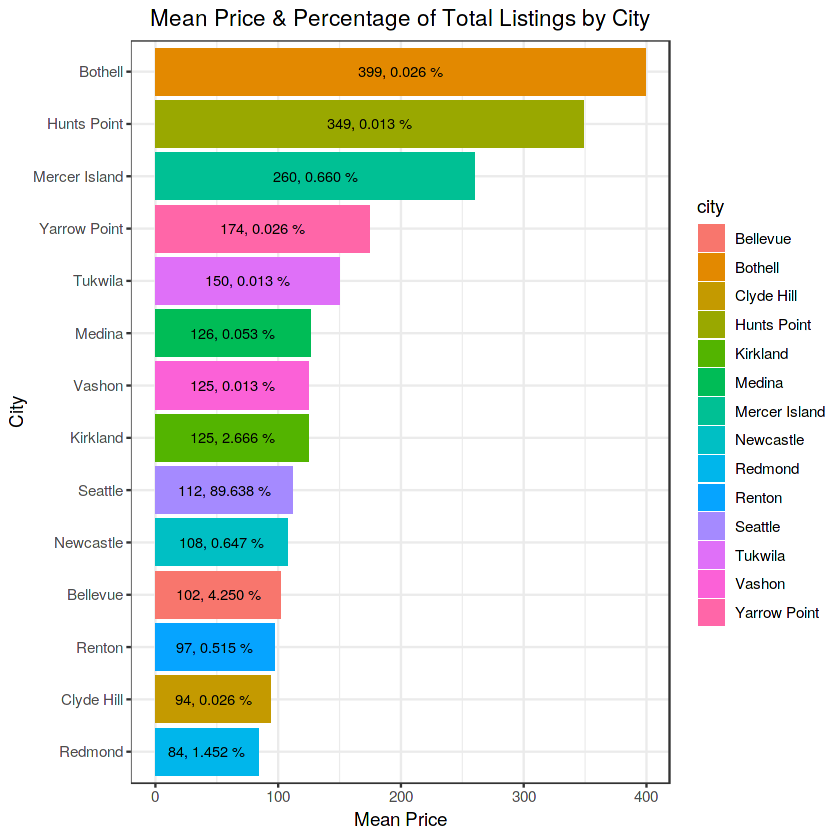

In [ ]:
city_comp %>%
  ggplot(aes(x = reorder(city, mean_price), y = mean_price,
                          fill = city, label = citylab))+
  geom_bar(stat = "identity")+
  coord_flip()+
  xlab("City")+
  ylab("Mean Price")+
  ggtitle("Mean Price & Percentage of Total Listings by City")+
  geom_text(size = 3, position = position_stack(vjust = 0.5))+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

Over 89% of listings are in Seattle with an average price of $112 per night. The top 7 highest average-priced listings make up about 0.8% of the total, with an average price of $226.10 per night. This lower percentage of high-priced listings and the concentration of nearly 90% in Seattle explains the lower correlation between price and location.

# 4. **Feature Engineering:**
   - Engineer new features from the existing ones that may be useful for the prediction task. For example, one might use the latitude and longitude data to create a new feature that represents the distance from a popular landmark.


## Feature: "rating"
The "rating" feature ranges from 0 to 5, with a mean of 4.841. To explore its relationship with mean price by city for price prediction, create the rating_comp dataframe to compare mean price and rating. Set parameters for a dual-axis plot, then plot a bar chart for ratings with an overlapping red line for price.

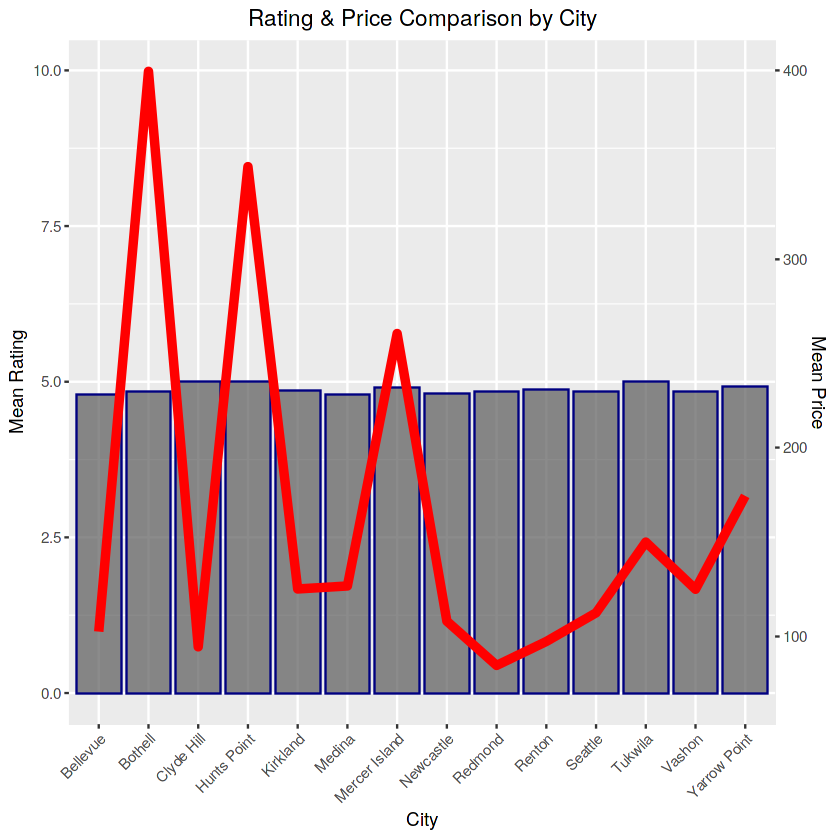

In [ ]:
rating_comp <-airbnb %>% group_by(city) %>%
 summarize(mean_rating = mean(rating), mean_price = mean(price)) %>%
  select(city, mean_rating, mean_price)

# Set the parameters for the dual-axis plot:
ylim_1 <-c(0,10)
ylim_2 <-c(70, 400)
b <- diff(ylim_1)/diff(ylim_2)
a <- b*(ylim_1[1] - ylim_2[1])

# Plot the Barplot (Rating) with Overlapping Line (Price):
ggplot(rating_comp, aes(city, group =1))+
  geom_bar(aes(y=mean_rating), stat="identity", color = "navyblue", alpha=.7)+
  geom_line(aes(y = a + mean_price*b), color = "red", size = 2)+
  scale_y_continuous(name = "Mean Rating",
                     sec.axis = sec_axis(~ (. - a)/b, name = "Mean Price"))+
  xlab("City")+
  ggtitle("Rating & Price Comparison by City")+
  theme(axis.text.x = element_text(angle = 45, hjust=1),
        plot.title = element_text(hjust = 0.5))

In [ ]:
range(rating_comp$mean_rating)

[1] 4.796 5.000

Due to the narrow range of mean ratings by city, there's a low correlation between price and rating. For instance, high prices don't ensure higher ratings; Bothell, the most expensive city, doesn't have the highest rating. Additionally, cities with lower average prices often have higher mean ratings than Bothell.

## Feature: "reviews_sum"

compare the total number of reviews and different price ranges:

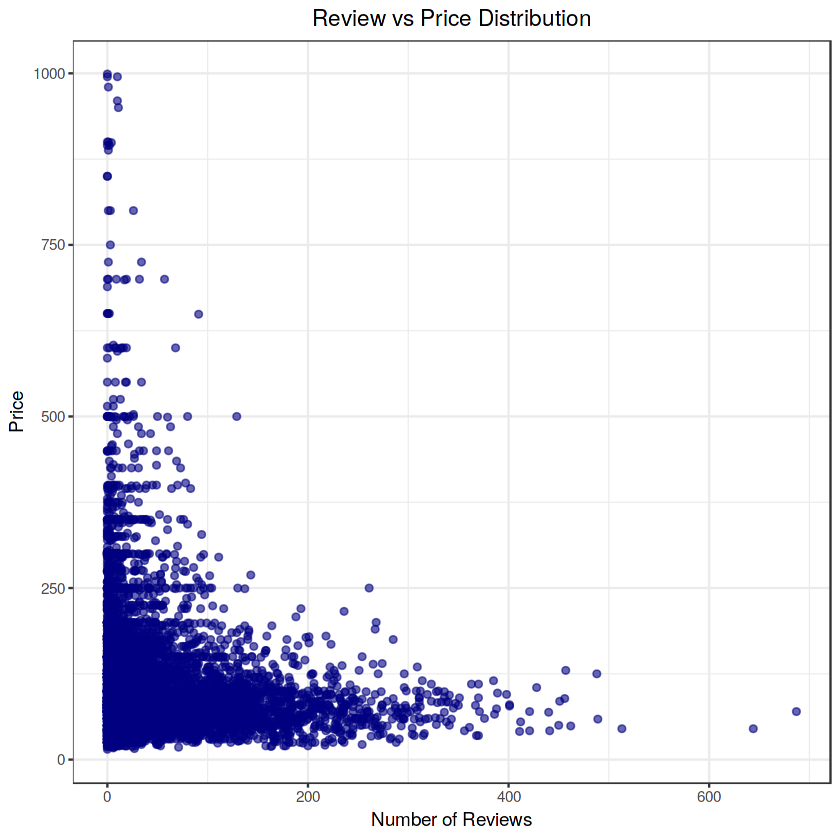

In [ ]:
airbnb %>% filter(price <= 1000) %>%
  ggplot(aes(x = reviews_sum, y = price))+
  geom_point(color="navyblue", alpha = 0.6, size = 1.5)+
  xlab("Number of Reviews")+
  ylab("Price")+
  ggtitle("Review vs Price Distribution")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

The visualization indicates that listings with higher prices (above ~$500) generally have fewer reviews, likely due to fewer stays at these prices.

## Feature: "room_type"
There are 3 room types: Entire home/apartment, Private Room, and Shared Room. Let's explore the relationship between room type and average price.

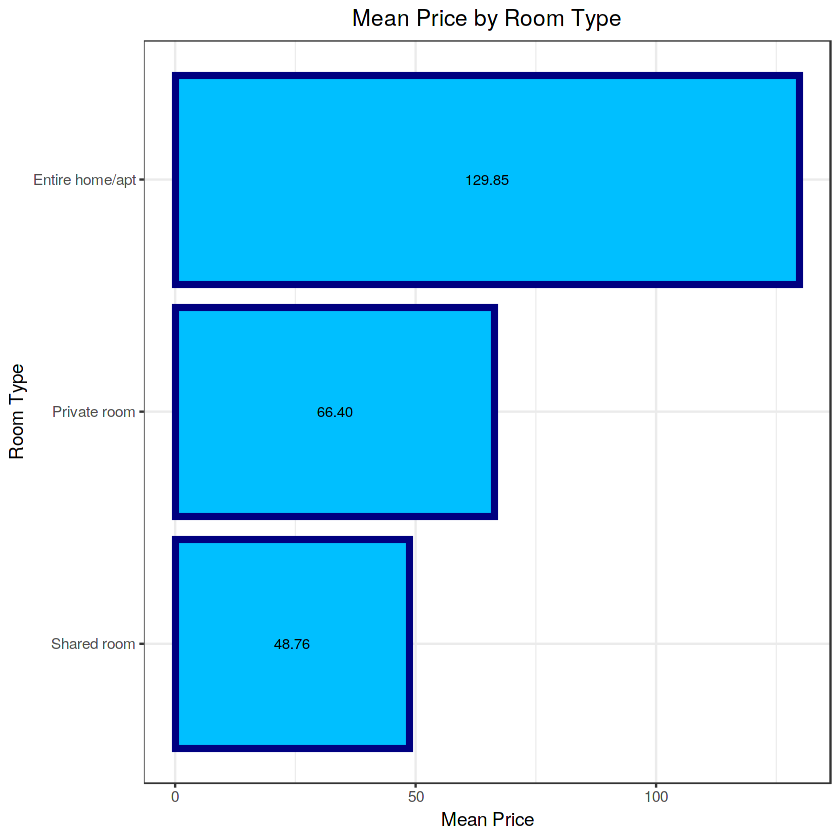

In [ ]:
airbnb %>% group_by(room_type) %>%
  summarize(mean_price = mean(price)) %>%
  ggplot(aes(reorder(room_type, mean_price),
             y = mean_price, label=sprintf("%0.2f",
                                           round(mean_price, digits = 2))))+
  geom_bar(stat = "identity", color = "navyblue",
           size = 1.5, fill = "deepskyblue")+
  coord_flip()+
  xlab("Room Type")+
  ylab("Mean Price")+
  ggtitle("Mean Price by Room Type")+
  geom_text(size = 3,
            position = position_stack(vjust = 0.5))+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

## Feature: "bathrooms"
Bathrooms range from 0 to 8 in increments of 0.5 per listing. Let's create a visualization to show the mean price per listing based on the number of bathrooms available.

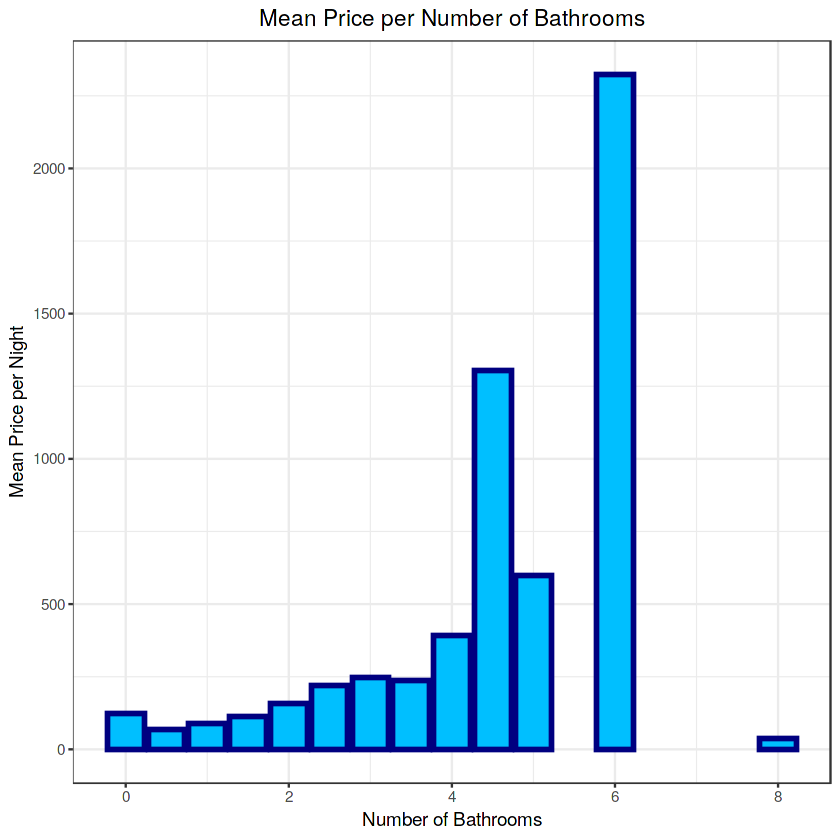

In [ ]:
airbnb %>% group_by(bathrooms) %>% summarize(mean_price = mean(price)) %>%
  ggplot(aes(bathrooms, mean_price))+
  geom_bar(stat = "identity", fill = "deepskyblue", color = "navyblue", size = 1.2)+
  xlab("Number of Bathrooms")+
  ylab("Mean Price per Night")+
  ggtitle("Mean Price per Number of Bathrooms")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

We observe that typically, higher numbers of bathrooms per listing correlate with higher prices. Interestingly, listings with 0 bathrooms had a higher average price than those with 0.5 to 1.5 bathrooms and even 8 bathrooms. This suggests that a listing with 8 bathrooms having a lower mean price than one with only one bathroom is likely an outlier.

Now, let's create a bar plot to visualize the total number of listings per bathroom count.

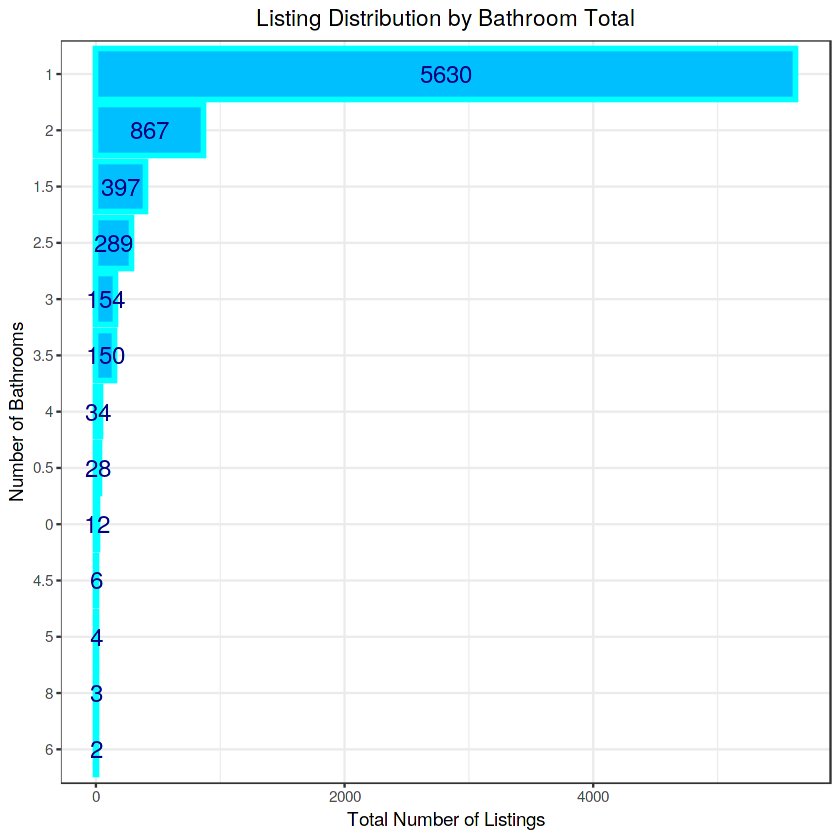

In [ ]:
airbnb %>% group_by(bathrooms) %>% summarize(sum_bath = length(bathrooms)) %>%
  ggplot(aes(reorder(bathrooms, sum_bath), y=sum_bath, label = sum_bath))+
  geom_bar(stat = "identity", fill = "deepskyblue", color = "cyan", size = 1.2)+
  coord_flip()+
  geom_text(size = 5, color = "navyblue",
            position = position_stack(vjust = 0.5))+
  xlab("Number of Bathrooms")+
  ylab("Total Number of Listings")+
  ggtitle("Listing Distribution by Bathroom Total")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

It's clear that the majority of listings, approximately 74%, have only 1 bathroom.


It seems like there might be a slight confusion in your request. You mentioned exploring the relationship between mean price per listing and the number of bedrooms, but then referred to beds. Could you please confirm whether you meant to explore the relationship between mean price per listing and the number of bedrooms or the number of beds?

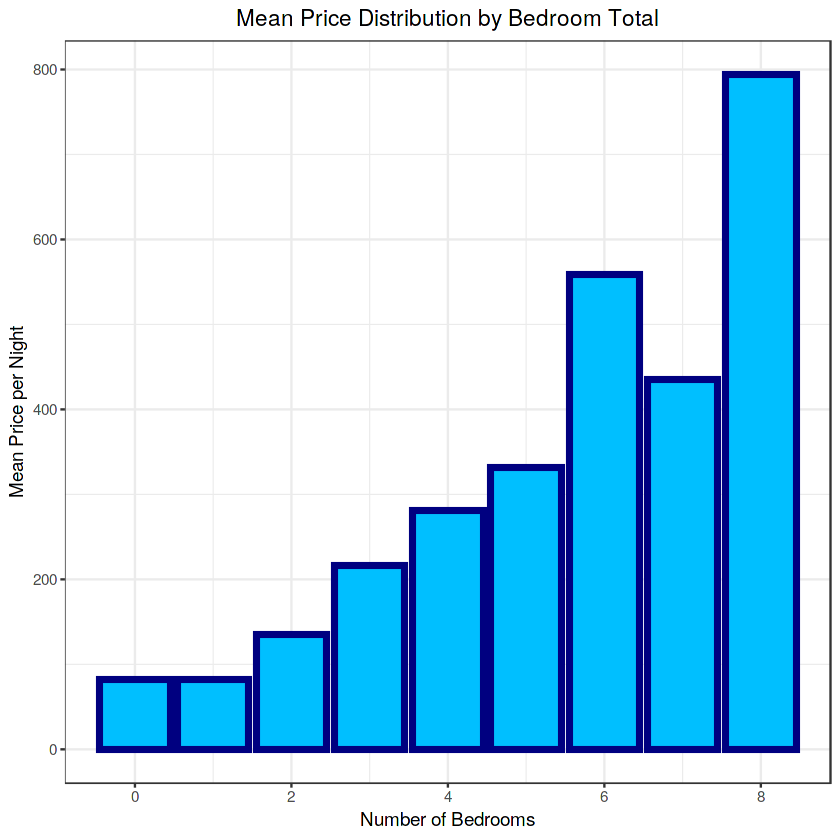

In [ ]:
airbnb %>% group_by(bedrooms) %>%
  summarize(mean_price = mean(price)) %>%
  ggplot(aes(bedrooms, mean_price))+
  geom_bar(stat = "identity",
           color = "navyblue", fill = "deepskyblue", size = 1.5)+
  xlab("Number of Bedrooms")+
  ylab("Mean Price per Night")+
  ggtitle("Mean Price Distribution by Bedroom Total")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

The visualization confirms a moderately positive correlation between price and the number of bedrooms. This feature is likely to significantly contribute to the accuracy of our price prediction models.

Now, let's explore the distribution of listings by the number of bedrooms.

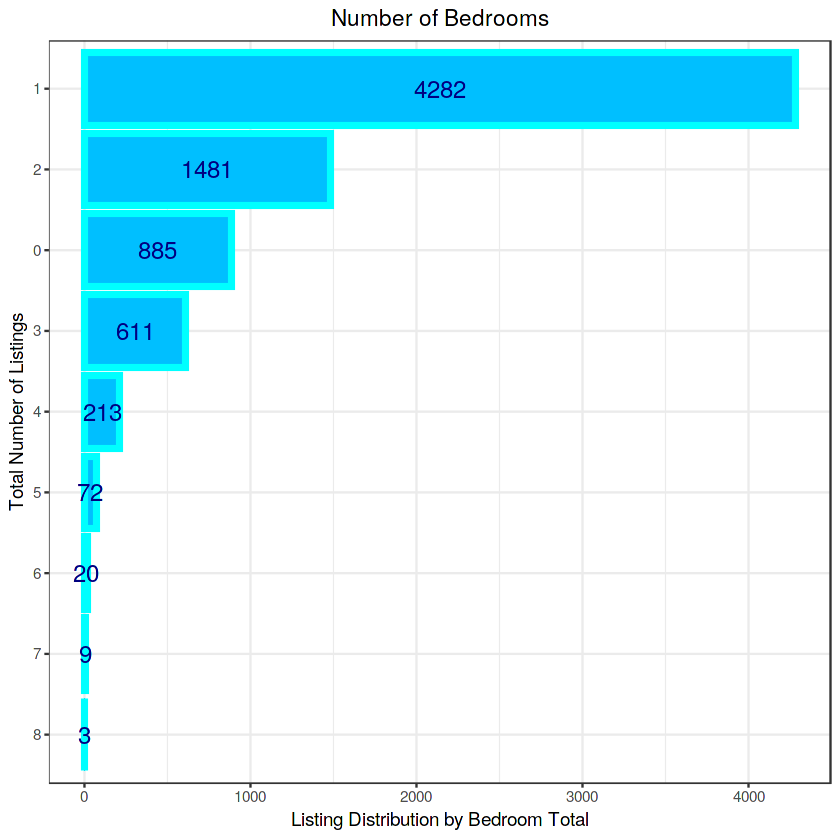

In [ ]:
airbnb %>% group_by(bedrooms) %>% summarize(sum_beds = length(bedrooms)) %>%
  ggplot(aes(reorder(bedrooms, sum_beds), y = sum_beds, label = sum_beds))+
  geom_bar(stat = "identity",
           color = "cyan", fill = "deepskyblue", size = 1.5)+
  coord_flip()+
  geom_text(size = 5, color = "navyblue",
            position = position_stack(vjust = 0.5))+
  xlab("Total Number of Listings")+
  ylab("Listing Distribution by Bedroom Total")+
  ggtitle("Number of Bedrooms")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

1-bedroom listings lead the distribution with 4,282 listings (56.5%). Based on these findings, there's a high probability that guests will rent a 1-bedroom, 1-bath unit.

## Feature: "accommodates"
Typically, we might predict that the mean price per night of a listing would increase with the number of guests it can accommodate. Let's visualize this relationship.

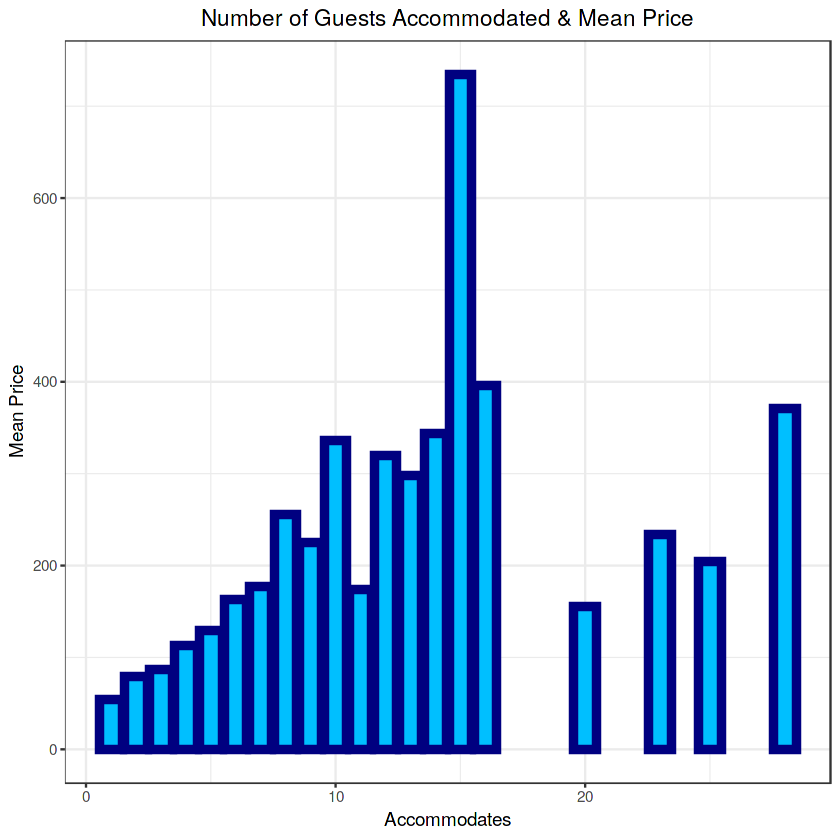

In [ ]:
airbnb %>% group_by(accommodates) %>% summarize(mean_price = mean(price)) %>%
  ggplot(aes(accommodates, mean_price))+
  geom_bar(stat = "identity", color = "navyblue",
           size = 2, fill = "deepskyblue")+
  xlab("Accommodates")+
  ylab("Mean Price")+
  ggtitle("Number of Guests Accommodated & Mean Price")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

The visualization confirms that there is a general increase in average price as the number of guests a listing can accommodate increases.

Finally, let's examine the distribution of listings based on the maximum number of guests they can accommodate.

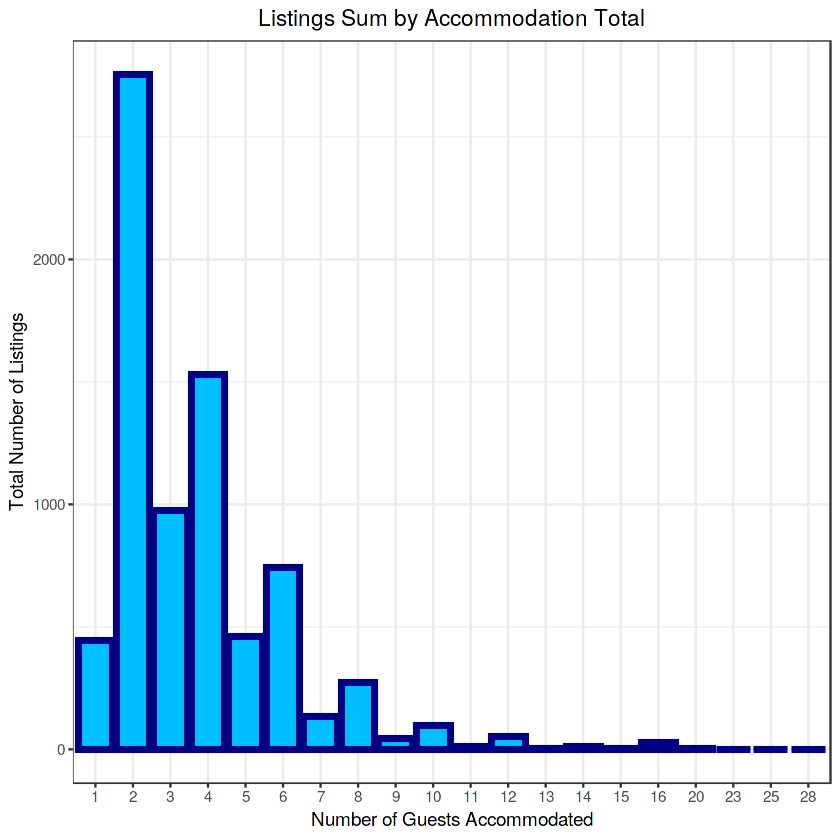

In [ ]:
airbnb %>% group_by(accommodates) %>%
  summarize(sum_acc = length(accommodates)) %>%
  ggplot(aes(x = factor(accommodates), y = sum_acc))+
  geom_bar(stat = "identity", color = "navyblue", fill = "deepskyblue", size = 1.5)+
  xlab("Number of Guests Accommodated")+
  ylab("Total Number of Listings")+
  ggtitle("Listings Sum by Accommodation Total")+
  theme_bw()+
  theme(plot.title = element_text(hjust = 0.5))

The majority of listings can accommodate 4 or fewer guests, with 2 guests being the most popular option.

EDA Conclusion:
The correlogram initially highlights significant relationships between price, bedrooms, bathrooms, and accommodation capacity, which were later confirmed through visualizations and quantitative analysis. Additionally, features like location (using latitude and longitude), rating, and review count show potential to enhance predictive model accuracy if included in our formula. "Room_type," although crucial, may need to be transformed into a quantitative scale for regression models, an aspect we will revisit in our conclusion.

# 5. **Modeling:**
   - Split the data into a training set and a testing set.
   - Build a regression model (or other appropriate model) to predict the price of a listing. Consider multiple different types of models, and evaluate their performance.
   - Include the visualization of these models using R's capabilities.


In [ ]:
# Set the seed for reproducibility:
set.seed(123, sample.kind = "Rounding")
test_index <- createDataPartition(y = airbnb$price, times = 1, p = 0.1, list = F)
airbnb_combined <- airbnb[-test_index,]
airbnb_test <- airbnb[test_index,]
# Remove test_index:
rm(test_index)

Warning message in set.seed(123, sample.kind = "Rounding"):
“non-uniform 'Rounding' sampler used”


splits airbnb_combined into airbnb_train (80%) and airbnb_validation (20%) using a specified random seed (random_state=42) for consistency in results. Adjust the random_state parameter for different randomization

In [ ]:
RMSE <-function(true_ratings, predicted_ratings){
  sqrt(mean((true_ratings - predicted_ratings)^2))
}

## The Loss Function / RMSE
The Root Mean Square Error (RMSE) calculates the square root of the average squared differences between predicted and actual values in the test set. RMSE is preferred in regression models because it penalizes larger errors more significantly, making it a suitable metric when minimizing large errors is crucial.

Mathematically, it is defined as:  
$$\sqrt{\frac{1}{N}\sum_{u,i}(\hat{y}_{u,i}-y_{u,i})^2}$$  


In [ ]:
RMSE <-function(true_ratings, predicted_ratings){
  sqrt(mean((true_ratings - predicted_ratings)^2))
}

In [ ]:
airbnb_train_median <-median(airbnb_train$price)

# 6. **Model Evaluation:**
   - Evaluate the model using appropriate metrics and techniques. This can include RMSE, etc.
   - Interpret the model results and document findings.



In [ ]:
MM_RMSE <-RMSE(validation$price, airbnb_train_median)
results_table <-tibble(Model_Type = "Baseline Median",
                       RMSE = MM_RMSE) %>%
  mutate(RMSE = sprintf("%0.2f", RMSE))
knitr::kable(results_table)



|Model_Type      |RMSE  |
|:---------------|:-----|
|Baseline Median |99.05 |

The Baseline Model achieves an RMSE of 99.05.

## Vectorize the optimal formula that will be used for most Models:

The formula has been determined by the above EDA as well as experimentation
on the training models. Additionally, the formula will reduce lines of code.


In [ ]:
airbnb_form <-price ~ rating + reviews_sum + bedrooms + bathrooms +
  accommodates + latitude + longitude

## Linear Model:

With linear regression, we attempt to predict a (dependent) $y$ variable, in this case "price", with the(independent) input $x$ variables: rating + reviews_sum + bedrooms + bathrooms + accommodates + latitude + longitude in order to build a
statistically significant model with a p-value less than .05.


In [ ]:
lm_airbnb <- lm(airbnb_form, data = airbnb_train)

# Create the prediction
lm_preds <-predict(lm_airbnb, validation)

# Table the Results
LM_RMSE <-RMSE(validation$price, lm_preds)
results_table <-tibble(Model_Type = c("Baseline Median", "Linear"),
                       RMSE = c(MM_RMSE, LM_RMSE)) %>%
  mutate(RMSE = sprintf("%0.2f", RMSE))

knitr::kable(results_table)



|Model_Type      |RMSE  |
|:---------------|:-----|
|Baseline Median |99.05 |
|Linear          |73.80 |

# Linear Model accuracy  73.8.

<br>
<br>
<br>
<br>
<br>

# 7. **Report/Documentation:**
   - Document all steps, code, and visualizations in a R markdown document.
   - Create a final report which presents the findings of your analysis and modeling, including relevant visualizations and model summaries.


<br>
<br>
<br>
<br>


# In our Airbnb price prediction project, we've gone through several key steps to understand and prepare our data.

## Data Importing
First, we used the `readr` package to import our Airbnb dataset from a CSV file. This dataset contains various attributes about Airbnb listings in Seattle.

## Data Cleaning and Transformation
Next, using `dplyr` and `tidyr`, we cleaned our dataset by handling missing values and transforming certain features. For example, we replaced missing values in the "overall_satisfaction" column with the mean satisfaction rating. Similarly, we set missing values in the "bathrooms" column to zero, assuming listings without bathroom information have no bathrooms.

## Feature Exploration and Selection
We then explored the dataset to understand its features better. We identified and removed less relevant features like unique identifiers ("X1", "room_id", "host_id"), location-specific data ("address"), and descriptive columns ("name", "currency", "rate_type").

## Exploratory Data Analysis (EDA)
For our EDA, we visualized various aspects of the data. We created a correlation matrix to understand relationships between numeric variables. We also plotted density distributions of prices, geographic scatter plots to visualize price distribution across Seattle, and treemaps to show the distribution of listings by city.

## Feature Engineering
In feature engineering, we created new features or modified existing ones to potentially improve our model's predictive performance. For instance, we explored relationships between price and features like "rating", "reviews_sum", "room_type", "bathrooms", "bedrooms", and "accommodates". We found correlations between certain features (e.g., higher prices for listings with more bedrooms or bathrooms) and visualized these relationships through bar plots and scatter plots.

<br>
<br>
<br>
<br>

 # **Learning Outcomes:**
Students will gain experience with real-world data analysis and modeling tasks in R, including data cleaning, data transformation, exploratory data analysis, visualization, and predictive modeling. They will also learn how to document their work and present their findings in a clear and compelling manner.





# Learning Outcomes:

- Through practical application, gain proficiency in real-world data analysis and modeling using R.
- Acquire essential skills in data cleaning and transformation, ensuring data integrity and usability.
- Utilize exploratory data analysis (EDA) techniques to uncover meaningful insights and patterns within the Airbnb dataset.
- Master effective data visualization methods to articulate findings and trends clearly.
- Develop advanced predictive modeling abilities to forecast Airbnb listing prices based on pertinent features.
- Learn to document the data analysis process effectively and present findings in a compelling manner.

# Conclusion:

The visualizations, such as those examining guest capacity, bedrooms, and bathrooms per listing, provide actionable insights for Airbnb hosts aiming to optimize their revenue streams. Furthermore, the predictive pricing models offer detailed insights into guest preferences concerning specific listing attributes like location and number of bedrooms, providing precise guidance for hosts seeking to refine their pricing strategies.
